In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

2024-06-14 13:45:01.098940: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 13:45:01.099071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 13:45:01.228458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dataset_path = '/kaggle/input/kuhar-img84-dataset/classified_data/train'
validation_dataset_path = '/kaggle/input/kuhar-img84-dataset/classified_data/validation'

In [3]:
IMG_WIDTH = 369
IMG_HEIGHT = 369
BATCH_SIZE = 24

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 10905 images belonging to 18 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 4665 images belonging to 18 classes.


# LABELS:
18 labels



In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 1
1 : 10
2 : 11
3 : 12
4 : 13
5 : 14
6 : 15
7 : 16
8 : 17
9 : 18
10 : 2
11 : 3
12 : 4
13 : 5
14 : 6
15 : 7
16 : 8
17 : 9


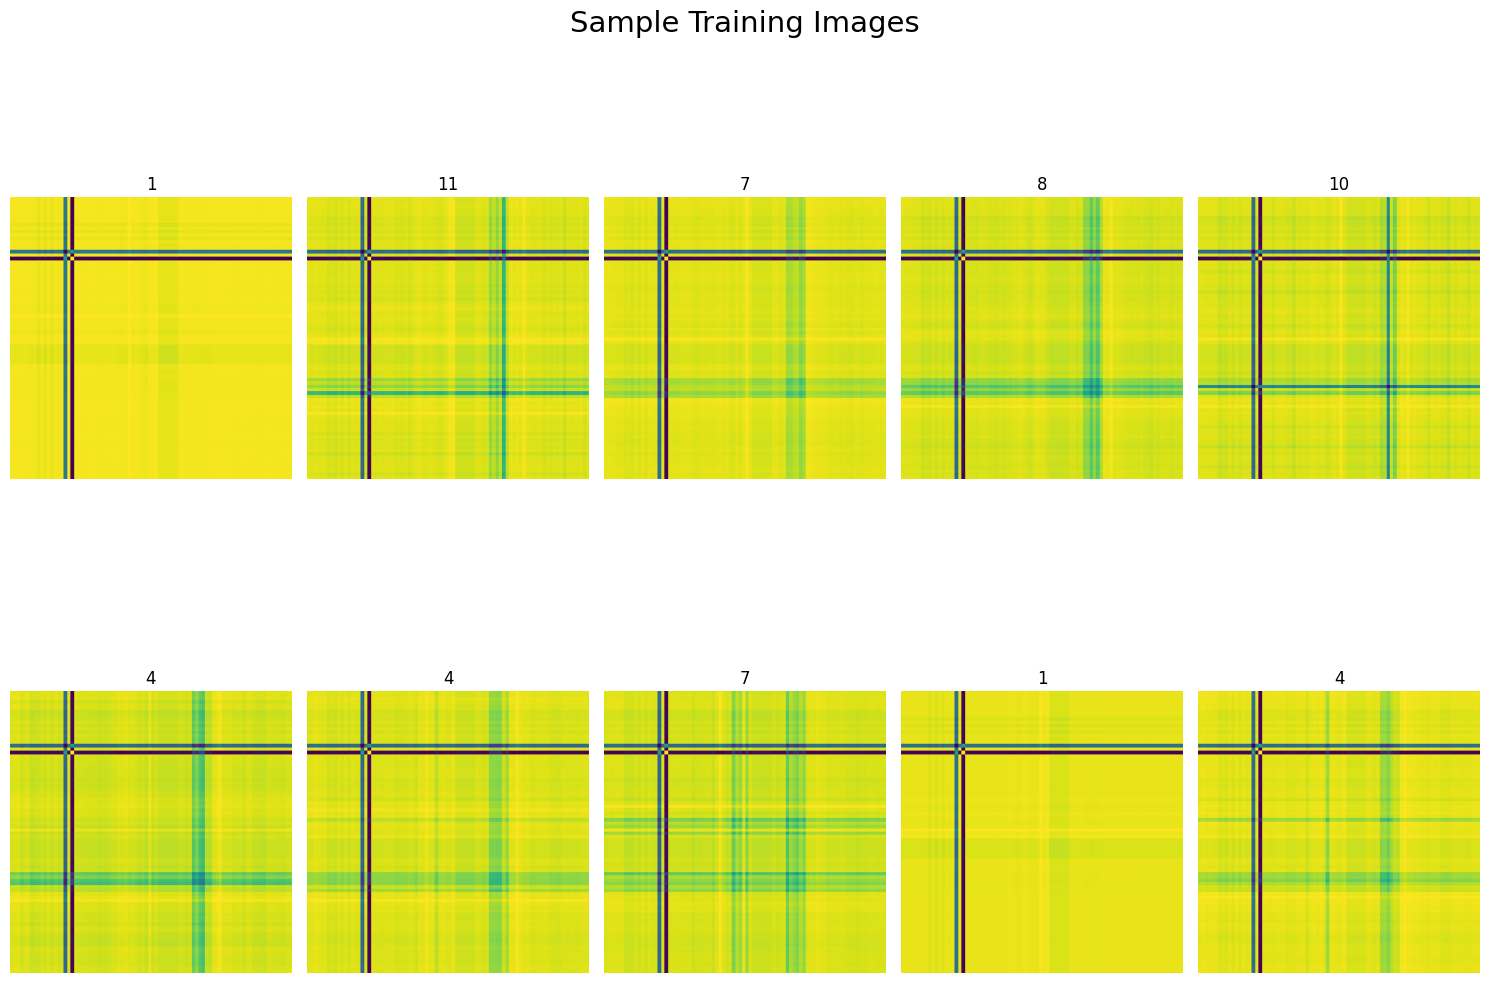

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import EfficientNetV2B1
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
%matplotlib inline

In [9]:
basemodel =EfficientNetV2B1(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(369, 369, 3)))

28456008/28456008 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
headmodel = basemodel.output
headmodel = MaxPooling2D(pool_size = (4,4))(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(18, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 369, 369,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 369, 369,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 369, 369,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 185, 185,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 185, 185,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 185, 185,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 185, 185,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 185, 185,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 185, 185,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 185, 185,  │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 185, 185,  │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 185, 185,  │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 185, 185,  │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 185, 185,  │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 93, 93,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 93, 93,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 93, 93,    │          0 │ block2a_expand_b

 Total params: 7,300,550 (27.85 MB)

 Trainable params: 7,229,478 (27.58 MB)

 Non-trainable params: 71,072 (277.62 KB)

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [13]:
optimizer = Adam(learning_rate=0.0001)

In [14]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [15]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20


I0000 00:00:1718372898.404036     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718372898.553818     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718373104.221056     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


455/455 - 404s - 888ms/step - accuracy: 0.5780 - loss: 1.2305 - val_accuracy: 0.6654 - val_loss: 0.8870 - learning_rate: 1.0000e-04
Epoch 2/20
455/455 - 121s - 266ms/step - accuracy: 0.7402 - loss: 0.6822 - val_accuracy: 0.7173 - val_loss: 0.8061 - learning_rate: 1.0000e-04
Epoch 3/20
455/455 - 122s - 268ms/step - accuracy: 0.7943 - loss: 0.5440 - val_accuracy: 0.7117 - val_loss: 0.8636 - learning_rate: 1.0000e-04
Epoch 4/20
455/455 - 123s - 270ms/step - accuracy: 0.8212 - loss: 0.4694 - val_accuracy: 0.7691 - val_loss: 0.7022 - learning_rate: 1.0000e-04
Epoch 5/20
455/455 - 121s - 265ms/step - accuracy: 0.8470 - loss: 0.4131 - val_accuracy: 0.7741 - val_loss: 0.7312 - learning_rate: 1.0000e-04
Epoch 6/20
455/455 - 121s - 266ms/step - accuracy: 0.8670 - loss: 0.3516 - val_accuracy: 0.7595 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 7/20
455/455 - 121s - 265ms/step - accuracy: 0.8784 - loss: 0.3263 - val_accuracy: 0.7839 - val_loss: 0.6921 - learning_rate: 1.0000e-04
Epoch 8/20

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
learning_rate = history.history['learning_rate']

In [18]:
print(f"Train Accuracy:     {max(train_accuracy)}")
print(f"Val Accuracy: {max(val_accuracy)}")

Train Accuracy:     0.9779000282287598
Val Accuracy: 0.8270096182823181


In [19]:
print(f"Train Loss:     {train_loss[19]}")
print(f"Val Loss: {val_loss[19]}")

Train Loss:     0.0647713840007782
Val Loss: 0.8413068652153015


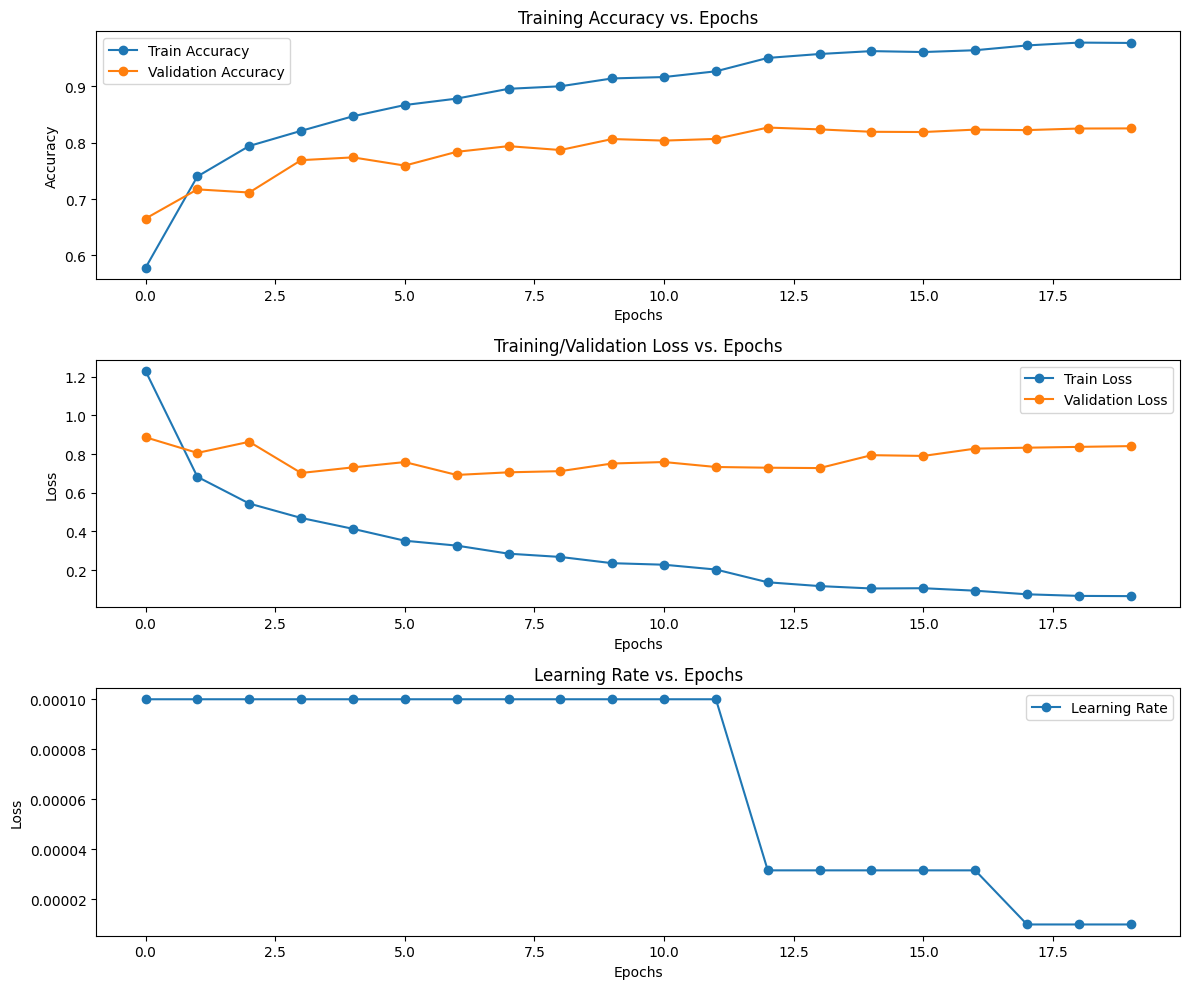

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [21]:
test_dataset = '/kaggle/input/kuhar-img84-dataset/classified_data/test'

In [22]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 5180 images belonging to 18 classes.


In [23]:
predictions = model.predict(test_generator)

  1/216 ━━━━━━━━━━━━━━━━━━━━ 25:51 7s/step

W0000 00:00:1718376700.178540     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


216/216 ━━━━━━━━━━━━━━━━━━━━ 74s 313ms/step


W0000 00:00:1718376767.381439     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


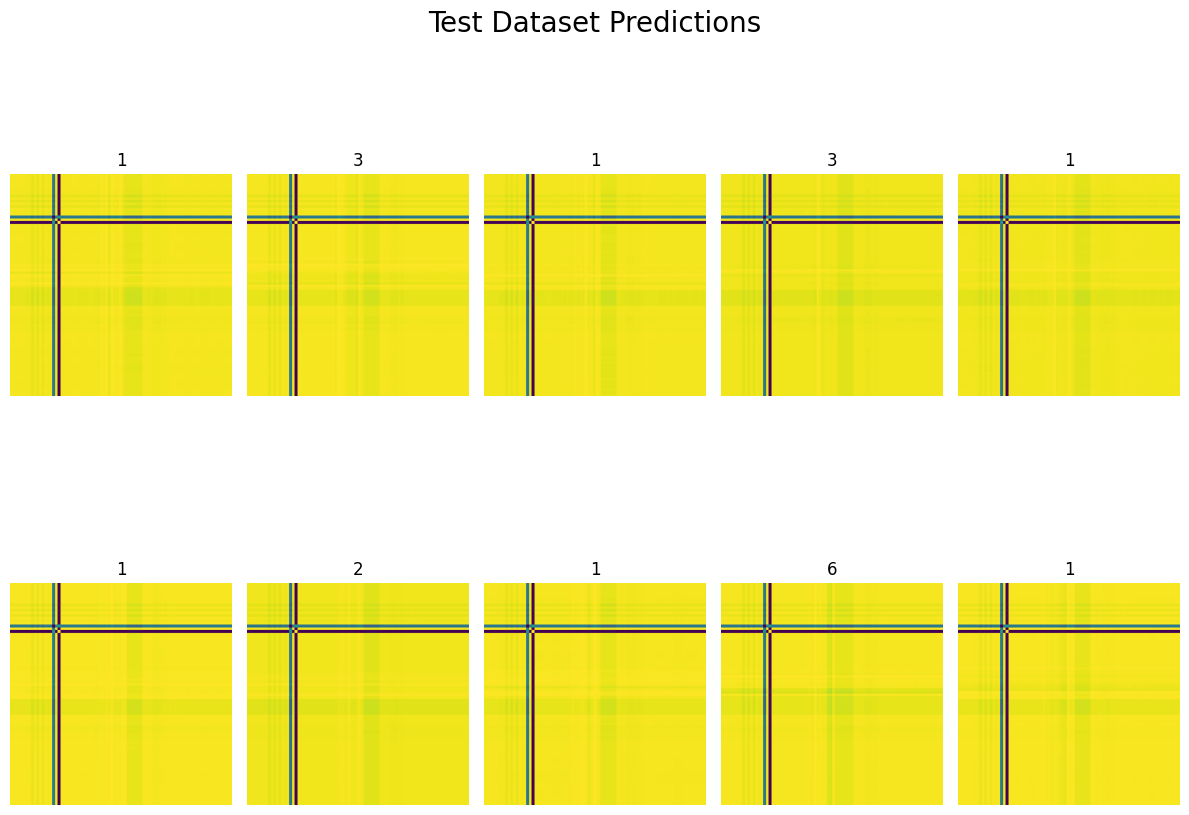

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.6903 - loss: 1.6272


W0000 00:00:1718376817.815560     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.2662391662597656
Test Accuracy: 0.7658300995826721


In [27]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

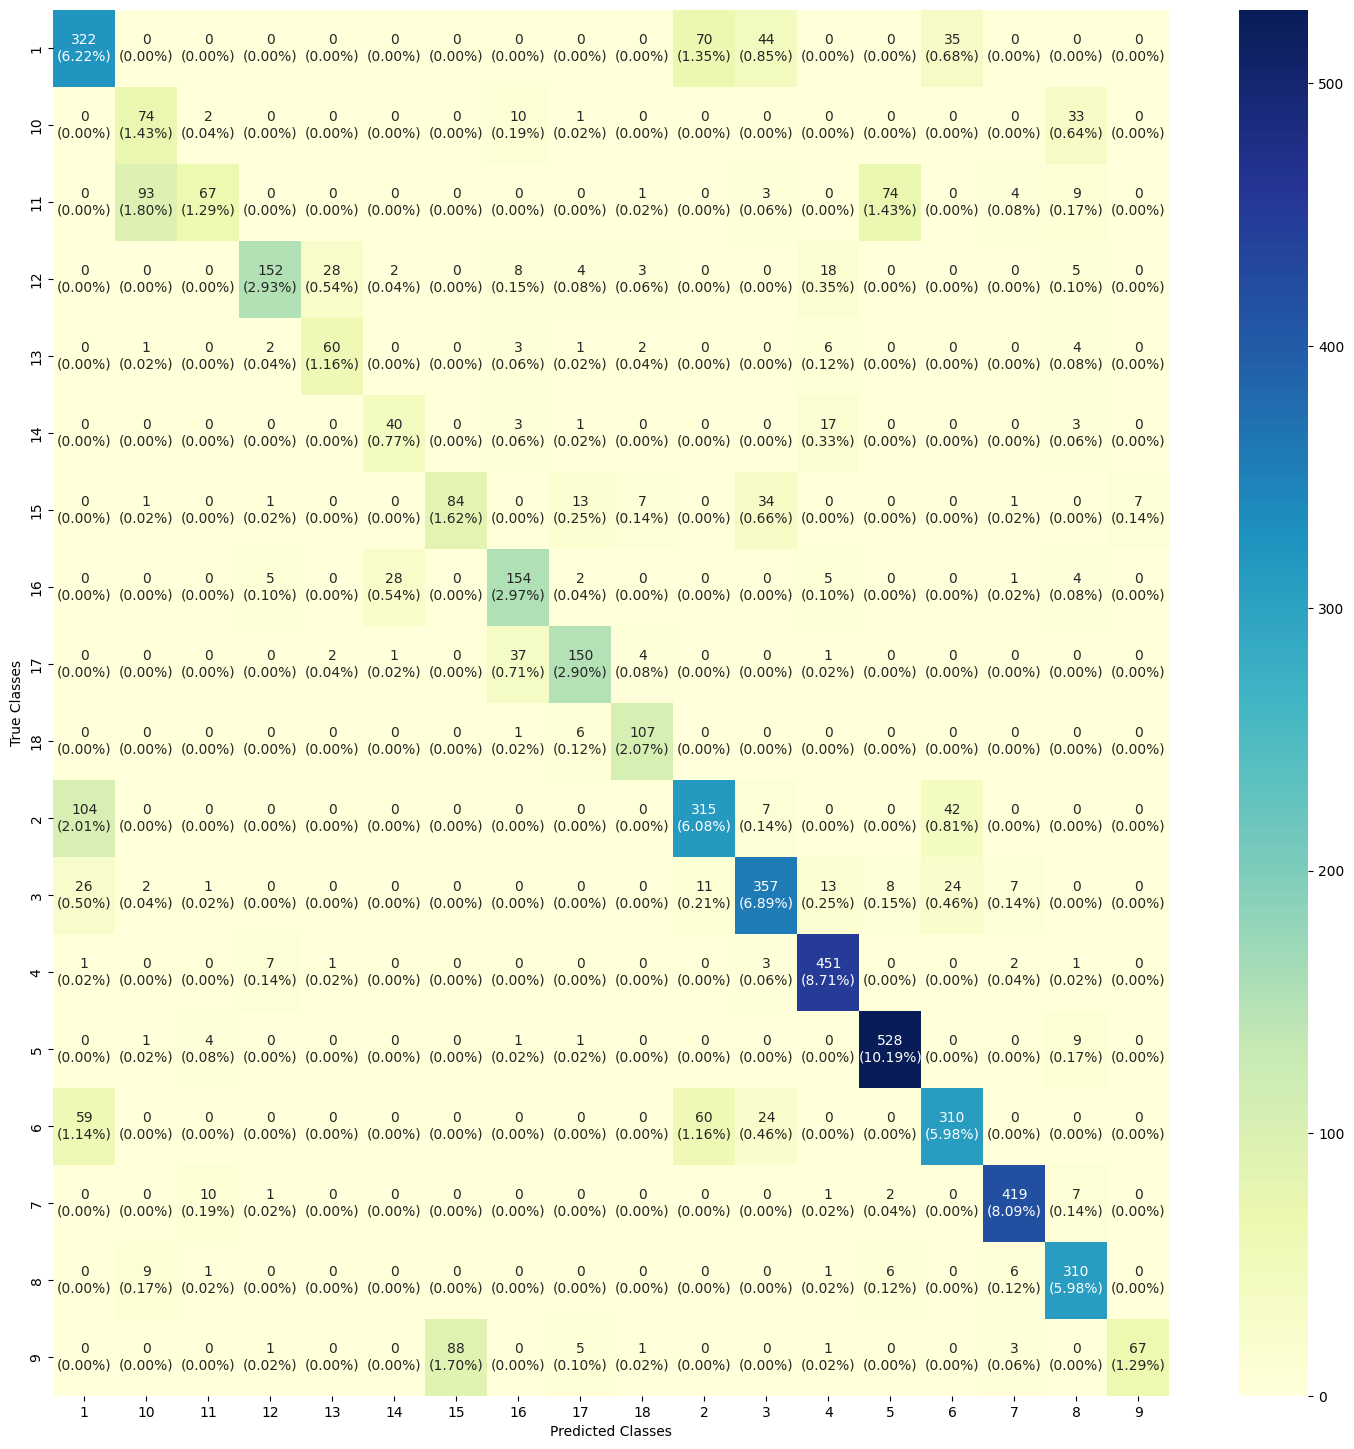

In [28]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(18, 18)

plt.figure(figsize = (18, 18))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [29]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           1       0.63      0.68      0.66       471
          10       0.41      0.62      0.49       120
          11       0.79      0.27      0.40       251
          12       0.90      0.69      0.78       220
          13       0.66      0.76      0.71        79
          14       0.56      0.62      0.59        64
          15       0.49      0.57      0.53       148
          16       0.71      0.77      0.74       199
          17       0.82      0.77      0.79       195
          18       0.86      0.94      0.90       114
           2       0.69      0.67      0.68       468
           3       0.76      0.80      0.78       449
           4       0.88      0.97      0.92       466
           5       0.85      0.97      0.91       544
           6       0.75      0.68      0.72       453
           7       0.95      0.95      0.95       440
           8       0.81      0.93      0.86       333
           9       0.91    

In [30]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [31]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

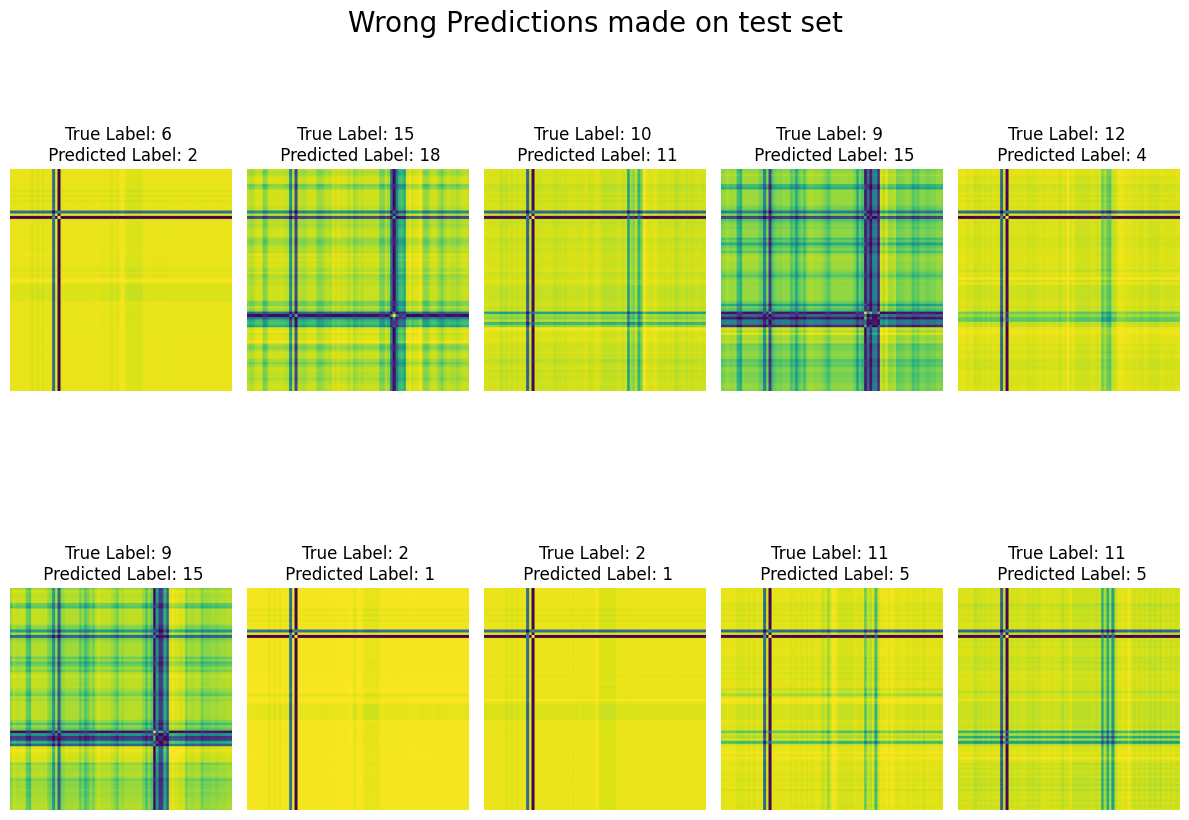

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [33]:
import glob
cv_img1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/1/*.png"):
    n= cv2.imread(img)
    cv_img1.append(n)
cv_img2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/2/*.png"):
    n= cv2.imread(img)
    cv_img2.append(n)
cv_img3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/3/*.png"):
    n= cv2.imread(img)
    cv_img3.append(n)
cv_img4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/4/*.png"):
    n= cv2.imread(img)
    cv_img4.append(n)
cv_img5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/5/*.png"):
    n= cv2.imread(img)
    cv_img5.append(n)
cv_img6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/6/*.png"):
    n= cv2.imread(img)
    cv_img6.append(n)
cv_img7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/7/*.png"):
    n= cv2.imread(img)
    cv_img7.append(n)
cv_img8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/8/*.png"):
    n= cv2.imread(img)
    cv_img8.append(n)
cv_img9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/9/*.png"):
    n= cv2.imread(img)
    cv_img9.append(n)
cv_img10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/10/*.png"):
    n= cv2.imread(img)
    cv_img10.append(n)
cv_img11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/11/*.png"):
    n= cv2.imread(img)
    cv_img11.append(n)
cv_img12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/12/*.png"):
    n= cv2.imread(img)
    cv_img12.append(n)
cv_img13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/13/*.png"):
    n= cv2.imread(img)
    cv_img13.append(n)
cv_img14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/14/*.png"):
    n= cv2.imread(img)
    cv_img14.append(n)
cv_img15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/15/*.png"):
    n= cv2.imread(img)
    cv_img15.append(n)
cv_img16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/16/*.png"):
    n= cv2.imread(img)
    cv_img16.append(n)
cv_img17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/17/*.png"):
    n= cv2.imread(img)
    cv_img17.append(n)
cv_img18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/train/18/*.png"):
    n= cv2.imread(img)
    cv_img18.append(n)

In [34]:
arr1 = np.array(cv_img1)
arr2 = np.array(cv_img2)
arr3 = np.array(cv_img3)
arr4 = np.array(cv_img4)
arr5 = np.array(cv_img5)
arr6 = np.array(cv_img6)
arr7 = np.array(cv_img7)
arr8 = np.array(cv_img8)
arr9 = np.array(cv_img9)
arr10 = np.array(cv_img10)
arr11 = np.array(cv_img11)
arr12 = np.array(cv_img12)
arr13 = np.array(cv_img13)
arr14 = np.array(cv_img14)
arr15 = np.array(cv_img15)
arr16 = np.array(cv_img16)
arr17 = np.array(cv_img17)
arr18 = np.array(cv_img18)

In [35]:
print(arr1.shape)
print(arr2.shape)
print(arr3.shape)
print(arr4.shape)
print(arr5.shape)
print(arr6.shape)
print(arr7.shape)
print(arr8.shape)
print(arr9.shape)
print(arr10.shape)
print(arr11.shape)
print(arr12.shape)
print(arr13.shape)
print(arr14.shape)
print(arr15.shape)
print(arr16.shape)
print(arr17.shape)
print(arr18.shape)

(991, 369, 369, 3)
(985, 369, 369, 3)
(944, 369, 369, 3)
(980, 369, 369, 3)
(1144, 369, 369, 3)
(952, 369, 369, 3)
(926, 369, 369, 3)
(700, 369, 369, 3)
(350, 369, 369, 3)
(252, 369, 369, 3)
(528, 369, 369, 3)
(464, 369, 369, 3)
(167, 369, 369, 3)
(137, 369, 369, 3)
(313, 369, 369, 3)
(420, 369, 369, 3)
(411, 369, 369, 3)
(241, 369, 369, 3)


In [36]:
train_data=np.concatenate([arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13,arr14,arr15,arr16,arr17,arr18],axis=0)

In [37]:
train_data.shape

(10905, 369, 369, 3)

In [38]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_env2b1=intermediate_model.predict(train_data)

341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step


In [39]:
feature_extractor_env2b1.shape

(10905, 2304)

In [40]:
del arr1,arr2,arr3,arr4,arr5,arr6,arr7,arr8,arr9,arr10,arr11,arr12,arr13,arr14,arr15,arr16,arr17,arr18 

In [41]:
Y1= np.full((991, 1), 1)
print(Y1.shape)
print(Y1[0])
Y2= np.full((985, 1), 2)
Y3= np.full((944, 1), 3)
Y4= np.full((980, 1), 4)
Y5= np.full((1144, 1), 5)
Y6= np.full((952, 1), 6)
Y7= np.full((926, 1), 7)
Y8= np.full((700, 1), 8)
Y9= np.full((350, 1), 9)
Y10= np.full((252, 1), 10)
Y11= np.full((528, 1), 11)
Y12= np.full((464, 1), 12)
Y13= np.full((167, 1), 13)
Y14= np.full((137, 1), 14)
Y15= np.full((313, 1), 15)
Y16= np.full((420, 1), 16)
Y17= np.full((411, 1), 17)
Y18= np.full((241, 1), 18)

(991, 1)
[1]


In [42]:
Y=np.concatenate([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18],axis=0)
print(Y.shape)

(10905, 1)


In [43]:
import glob
cv_imgt1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/1/*.png"):
    n= cv2.imread(img)
    cv_imgt1.append(n)
cv_imgt2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/2/*.png"):
    n= cv2.imread(img)
    cv_imgt2.append(n)
cv_imgt3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/3/*.png"):
    n= cv2.imread(img)
    cv_imgt3.append(n)
cv_imgt4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/4/*.png"):
    n= cv2.imread(img)
    cv_imgt4.append(n)
cv_imgt5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/5/*.png"):
    n= cv2.imread(img)
    cv_imgt5.append(n)
cv_imgt6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/6/*.png"):
    n= cv2.imread(img)
    cv_imgt6.append(n)
cv_imgt7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/7/*.png"):
    n= cv2.imread(img)
    cv_imgt7.append(n)
cv_imgt8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/8/*.png"):
    n= cv2.imread(img)
    cv_imgt8.append(n)
cv_imgt9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/9/*.png"):
    n= cv2.imread(img)
    cv_imgt9.append(n)
cv_imgt10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/10/*.png"):
    n= cv2.imread(img)
    cv_imgt10.append(n)
cv_imgt11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/11/*.png"):
    n= cv2.imread(img)
    cv_imgt11.append(n)
cv_imgt12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/12/*.png"):
    n= cv2.imread(img)
    cv_imgt12.append(n)
cv_imgt13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/13/*.png"):
    n= cv2.imread(img)
    cv_imgt13.append(n)
cv_imgt14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/14/*.png"):
    n= cv2.imread(img)
    cv_imgt14.append(n)
cv_imgt15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/15/*.png"):
    n= cv2.imread(img)
    cv_imgt15.append(n)
cv_imgt16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/16/*.png"):
    n= cv2.imread(img)
    cv_imgt16.append(n)
cv_imgt17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/17/*.png"):
    n= cv2.imread(img)
    cv_imgt17.append(n)
cv_imgt18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/test/18/*.png"):
    n= cv2.imread(img)
    cv_imgt18.append(n)

In [44]:
arrt1 = np.array(cv_imgt1)
arrt2 = np.array(cv_imgt2)
arrt3 = np.array(cv_imgt3)
arrt4 = np.array(cv_imgt4)
arrt5 = np.array(cv_imgt5)
arrt6 = np.array(cv_imgt6)
arrt7 = np.array(cv_imgt7)
arrt8 = np.array(cv_imgt8)
arrt9 = np.array(cv_imgt9)
arrt10 = np.array(cv_imgt10)
arrt11 = np.array(cv_imgt11)
arrt12 = np.array(cv_imgt12)
arrt13 = np.array(cv_imgt13)
arrt14 = np.array(cv_imgt14)
arrt15 = np.array(cv_imgt15)
arrt16 = np.array(cv_imgt16)
arrt17 = np.array(cv_imgt17)
arrt18 = np.array(cv_imgt18)

In [45]:
print(arrt1.shape)
print(arrt2.shape)
print(arrt3.shape)
print(arrt4.shape)
print(arrt5.shape)
print(arrt6.shape)
print(arrt7.shape)
print(arrt8.shape)
print(arrt9.shape)
print(arrt10.shape)
print(arrt11.shape)
print(arrt12.shape)
print(arrt13.shape)
print(arrt14.shape)
print(arrt15.shape)
print(arrt16.shape)
print(arrt17.shape)
print(arrt18.shape)

(471, 369, 369, 3)
(468, 369, 369, 3)
(449, 369, 369, 3)
(466, 369, 369, 3)
(544, 369, 369, 3)
(453, 369, 369, 3)
(440, 369, 369, 3)
(333, 369, 369, 3)
(166, 369, 369, 3)
(120, 369, 369, 3)
(251, 369, 369, 3)
(220, 369, 369, 3)
(79, 369, 369, 3)
(64, 369, 369, 3)
(148, 369, 369, 3)
(199, 369, 369, 3)
(195, 369, 369, 3)
(114, 369, 369, 3)


In [46]:
test_data=np.concatenate([arrt1,arrt2,arrt3,arrt4,arrt5,arrt6,arrt7,arrt8,arrt9,arrt10,arrt11,arrt12,arrt13,arrt14,arrt15,arrt16,arrt17,arrt18],axis=0)

In [47]:
test_data.shape

(5180, 369, 369, 3)

In [48]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_env2b1_test=intermediate_model.predict(test_data)

162/162 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step


In [49]:
feature_extractor_env2b1_test.shape

(5180, 2304)

In [50]:
Yt1= np.full((471, 1), 1)
print(Y1.shape)
print(Y1[0])
Yt2= np.full((468, 1), 2)
Yt3= np.full((449, 1), 3)
Yt4= np.full((466, 1), 4)
Yt5= np.full((544, 1), 5)
Yt6= np.full((453, 1), 6)
Yt7= np.full((440, 1), 7)
Yt8= np.full((333, 1), 8)
Yt9= np.full((166, 1), 9)
Yt10= np.full((120, 1), 10)
Yt11= np.full((251, 1), 11)
Yt12= np.full((220, 1), 12)
Yt13= np.full((79, 1), 13)
Yt14= np.full((64, 1), 14)
Yt15= np.full((148, 1), 15)
Yt16= np.full((199, 1), 16)
Yt17= np.full((195, 1), 17)
Yt18= np.full((114, 1), 18)

(991, 1)
[1]


In [51]:
Yt=np.concatenate([Yt1,Yt2,Yt3,Yt4,Yt5,Yt6,Yt7,Yt8,Yt9,Yt10,Yt11,Yt12,Yt13,Yt14,Yt15,Yt16,Yt17,Yt18],axis=0)
print(Yt.shape)

(5180, 1)


In [53]:
del arrt1,arrt2,arrt3,arrt4,arrt5,arrt6,arrt7,arrt8,arrt9,arrt10,arrt11,arrt12,arrt13,arrt14,arrt15,arrt16,arrt17,arrt18 

In [52]:
import glob
cv_imgv1 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/1/*.png"):
    n= cv2.imread(img)
    cv_imgv1.append(n)
cv_imgv2 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/2/*.png"):
    n= cv2.imread(img)
    cv_imgv2.append(n)
cv_imgv3 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/3/*.png"):
    n= cv2.imread(img)
    cv_imgv3.append(n)
cv_imgv4 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/4/*.png"):
    n= cv2.imread(img)
    cv_imgv4.append(n)
cv_imgv5 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/5/*.png"):
    n= cv2.imread(img)
    cv_imgv5.append(n)
cv_imgv6 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/6/*.png"):
    n= cv2.imread(img)
    cv_imgv6.append(n)
cv_imgv7 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/7/*.png"):
    n= cv2.imread(img)
    cv_imgv7.append(n)
cv_imgv8 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/8/*.png"):
    n= cv2.imread(img)
    cv_imgv8.append(n)
cv_imgv9 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/9/*.png"):
    n= cv2.imread(img)
    cv_imgv9.append(n)
cv_imgv10 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/10/*.png"):
    n= cv2.imread(img)
    cv_imgv10.append(n)
cv_imgv11 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/11/*.png"):
    n= cv2.imread(img)
    cv_imgv11.append(n)
cv_imgv12 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/12/*.png"):
    n= cv2.imread(img)
    cv_imgv12.append(n)
cv_imgv13 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/13/*.png"):
    n= cv2.imread(img)
    cv_imgv13.append(n)
cv_imgv14 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/14/*.png"):
    n= cv2.imread(img)
    cv_imgv14.append(n)
cv_imgv15 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/15/*.png"):
    n= cv2.imread(img)
    cv_imgv15.append(n)
cv_imgv16 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/16/*.png"):
    n= cv2.imread(img)
    cv_imgv16.append(n)
cv_imgv17 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/17/*.png"):
    n= cv2.imread(img)
    cv_imgv17.append(n)
cv_imgv18 = []
for img in glob.glob("/kaggle/input/kuhar-img84-dataset/classified_data/validation/18/*.png"):
    n= cv2.imread(img)
    cv_imgv18.append(n)

In [54]:
arrv1 = np.array(cv_imgv1)
arrv2 = np.array(cv_imgv2)
arrv3 = np.array(cv_imgv3)
arrv4 = np.array(cv_imgv4)
arrv5 = np.array(cv_imgv5)
arrv6 = np.array(cv_imgv6)
arrv7 = np.array(cv_imgv7)
arrv8 = np.array(cv_imgv8)
arrv9 = np.array(cv_imgv9)
arrv10 = np.array(cv_imgv10)
arrv11 = np.array(cv_imgv11)
arrv12 = np.array(cv_imgv12)
arrv13 = np.array(cv_imgv13)
arrv14 = np.array(cv_imgv14)
arrv15 = np.array(cv_imgv15)
arrv16 = np.array(cv_imgv16)
arrv17 = np.array(cv_imgv17)
arrv18 = np.array(cv_imgv18)

In [55]:
print(arrv1.shape)
print(arrv2.shape)
print(arrv3.shape)
print(arrv4.shape)
print(arrv5.shape)
print(arrv6.shape)
print(arrv7.shape)
print(arrv8.shape)
print(arrv9.shape)
print(arrv10.shape)
print(arrv11.shape)
print(arrv12.shape)
print(arrv13.shape)
print(arrv14.shape)
print(arrv15.shape)
print(arrv16.shape)
print(arrv17.shape)
print(arrv18.shape)

(424, 369, 369, 3)
(421, 369, 369, 3)
(404, 369, 369, 3)
(420, 369, 369, 3)
(490, 369, 369, 3)
(408, 369, 369, 3)
(396, 369, 369, 3)
(300, 369, 369, 3)
(150, 369, 369, 3)
(108, 369, 369, 3)
(226, 369, 369, 3)
(198, 369, 369, 3)
(71, 369, 369, 3)
(58, 369, 369, 3)
(134, 369, 369, 3)
(179, 369, 369, 3)
(175, 369, 369, 3)
(103, 369, 369, 3)


In [56]:
val_data=np.concatenate([arrv1,arrv2,arrv3,arrv4,arrv5,arrv6,arrv7,arrv8,arrv9,arrv10,arrv11,arrv12,arrv13,arrv14,arrv15,arrv16,arrv17,arrv18],axis=0)

In [57]:
val_data.shape

(4665, 369, 369, 3)

In [58]:
layer_output = model.get_layer('flatten').output
intermediate_model= Model(inputs=model.input, outputs=layer_output)
feature_extractor_env2b1_val=intermediate_model.predict(val_data)

146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step


In [59]:
feature_extractor_env2b1_val.shape

(4665, 2304)

In [60]:
Yv1= np.full((424, 1), 1)
print(Y1.shape)
print(Y1[0])
Yv2= np.full((421, 1), 2)
Yv3= np.full((404, 1), 3)
Yv4= np.full((420, 1), 4)
Yv5= np.full((490, 1), 5)
Yv6= np.full((408, 1), 6)
Yv7= np.full((396, 1), 7)
Yv8= np.full((300, 1), 8)
Yv9= np.full((150, 1), 9)
Yv10= np.full((108, 1), 10)
Yv11= np.full((226, 1), 11)
Yv12= np.full((198, 1), 12)
Yv13= np.full((71, 1), 13)
Yv14= np.full((58, 1), 14)
Yv15= np.full((134, 1), 15)
Yv16= np.full((179, 1), 16)
Yv17= np.full((175, 1), 17)
Yv18= np.full((103, 1), 18)

(991, 1)
[1]


In [61]:
Yv=np.concatenate([Yv1,Yv2,Yv3,Yv4,Yv5,Yv6,Yv7,Yv8,Yv9,Yv10,Yv11,Yv12,Yv13,Yv14,Yv15,Yv16,Yv17,Yv18],axis=0)
print(Yv.shape)

(4665, 1)


In [62]:
X_env2b1=np.concatenate([feature_extractor_env2b1,feature_extractor_env2b1_val],axis=0)
print(X_env2b1.shape)

(15570, 2304)


In [63]:
Y_env2b1=np.concatenate([Y,Yv],axis=0)
print(Y_env2b1.shape)

(15570, 1)


In [64]:
import pandas as pd
df=pd.DataFrame(X_env2b1)
df.to_csv('kuhar_img84_X_2304features_env2b1.csv',index=False)

dfy=pd.DataFrame(Y_env2b1)
dfy.to_csv('kuhar_img84_Y_2304features_env2b1.csv',index=False)

dft=pd.DataFrame(feature_extractor_env2b1_test)
dft.to_csv('kuhar_img84_X_2304features_env2b1_test.csv',index=False)

dfyt=pd.DataFrame(Yt)
dfyt.to_csv('kuhar_img84_Y_2304features_env2b1_test.csv',index=False)